# Problem 1

We need to predict which of the Magic Keys given in “problem 1.csv” will buy milk and/or meat in the first 15 days of March-2019. We have to put Y in the purchase column if the Magic Keys will purchase and N if the Magic Keys will not make a purchase. 

## Necessary Libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

## Data Preprocessing

In [104]:
purchase_df = pd.read_csv("purchase.csv")
boxes_df = pd.read_csv("boxes.csv")
problem1_df = pd.read_csv("problem 1.csv")

In [105]:
purchase_df.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0


In [106]:
purchase_df.tail()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
2455859,28/10/2018,2BD992B5538,12.0,1.0
2455860,28/10/2018,2C97CD72233,17.0,1.0
2455861,28/10/2018,2C91C61D372,40.0,1.0
2455862,28/10/2018,2CD70CFC4E3,51.0,1.0
2455863,28/10/2018,2C4792A5B84,4.0,1.0


In [107]:
# Types of data in each columns
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455864 entries, 0 to 2455863
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   PURCHASE_DATE  object 
 1   MAGIC_KEY      object 
 2   BOX_ID         float64
 3   BOX_COUNT      float64
dtypes: float64(2), object(2)
memory usage: 74.9+ MB


In [108]:
# No. of unique entries in each columns
purchase_df.nunique()

PURCHASE_DATE        151
MAGIC_KEY        1274108
BOX_ID               291
BOX_COUNT             14
dtype: int64

In [109]:
# Convert Purchase Date from object to datetime
purchase_df["PURCHASE_DATE"] = pd.to_datetime(purchase_df["PURCHASE_DATE"], format="%d/%m/%Y")

# Convert Magic Key from object to categorical
purchase_df["MAGIC_KEY"] = purchase_df["MAGIC_KEY"].astype("category")

In [110]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455864 entries, 0 to 2455863
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   PURCHASE_DATE  datetime64[ns]
 1   MAGIC_KEY      category      
 2   BOX_ID         float64       
 3   BOX_COUNT      float64       
dtypes: category(1), datetime64[ns](1), float64(2)
memory usage: 107.5 MB


In [111]:
boxes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BOX_ID           290 non-null    int64  
 1   QUALITY          290 non-null    object 
 2   DELIVERY_OPTION  290 non-null    object 
 3   MILK             290 non-null    float64
 4   MEAT             290 non-null    float64
 5   UNIT_PRICE       290 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 13.7+ KB


In [112]:
boxes_df.nunique()

BOX_ID             290
QUALITY              2
DELIVERY_OPTION      3
MILK                28
MEAT                39
UNIT_PRICE          18
dtype: int64

In [113]:
# QUALITY and DELIVERY_OPTION are both categorical, hence encode these columns
le = LabelEncoder()

boxes_df["QUALITY"] = le.fit_transform(boxes_df["QUALITY"])
boxes_df["DELIVERY_OPTION"] = le.fit_transform(boxes_df["DELIVERY_OPTION"])

In [114]:
boxes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BOX_ID           290 non-null    int64  
 1   QUALITY          290 non-null    int32  
 2   DELIVERY_OPTION  290 non-null    int32  
 3   MILK             290 non-null    float64
 4   MEAT             290 non-null    float64
 5   UNIT_PRICE       290 non-null    float64
dtypes: float64(3), int32(2), int64(1)
memory usage: 11.5 KB


In [115]:
# Merge two dataframes
merged_df = pd.merge(purchase_df, boxes_df, on="BOX_ID", how="left")

In [116]:
merged_df

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,2019-02-01,2CED678A247,12.0,1.0,0.0,1.0,8.0,1.5,12.98
1,2019-02-01,2BF58D91BA1,12.0,1.0,0.0,1.0,8.0,1.5,12.98
2,2019-02-01,2C15B86534E,99.0,1.0,0.0,0.0,0.0,3.3,13.96
3,2019-02-01,2C32D9A859A,6.0,1.0,0.0,1.0,0.0,2.7,11.96
4,2019-02-01,2C7A55404D1,4.0,1.0,0.0,1.0,0.0,2.5,11.96
...,...,...,...,...,...,...,...,...,...
2455859,2018-10-28,2BD992B5538,12.0,1.0,0.0,1.0,8.0,1.5,12.98
2455860,2018-10-28,2C97CD72233,17.0,1.0,0.0,1.0,10.0,1.8,12.98
2455861,2018-10-28,2C91C61D372,40.0,1.0,0.0,1.0,12.0,1.8,19.98
2455862,2018-10-28,2CD70CFC4E3,51.0,1.0,0.0,1.0,18.0,2.9,23.98


In [117]:
merged_df = merged_df.drop(columns=["BOX_ID", "BOX_COUNT"])
merged_df

,PURCHASE_DATE,MAGIC_KEY,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,2019-02-01,2CED678A247,0.0,1.0,8.0,1.5,12.98
1,2019-02-01,2BF58D91BA1,0.0,1.0,8.0,1.5,12.98
2,2019-02-01,2C15B86534E,0.0,0.0,0.0,3.3,13.96
3,2019-02-01,2C32D9A859A,0.0,1.0,0.0,2.7,11.96
4,2019-02-01,2C7A55404D1,0.0,1.0,0.0,2.5,11.96
...,...,...,...,...,...,...,...
2455859,2018-10-28,2BD992B5538,0.0,1.0,8.0,1.5,12.98
2455860,2018-10-28,2C97CD72233,0.0,1.0,10.0,1.8,12.98
2455861,2018-10-28,2C91C61D372,0.0,1.0,12.0,1.8,19.98
2455862,2018-10-28,2CD70CFC4E3,0.0,1.0,18.0,2.9,23.98


## Feature Engineering

In [118]:
# Convert dtype of MAGIC_KEY column of problem1_df from object to category
problem1_df["MAGIC_KEY"] = problem1_df["MAGIC_KEY"].astype("category")

In [119]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455864 entries, 0 to 2455863
Data columns (total 7 columns):
 #   Column           Dtype         
---  ------           -----         
 0   PURCHASE_DATE    datetime64[ns]
 1   MAGIC_KEY        category      
 2   QUALITY          float64       
 3   DELIVERY_OPTION  float64       
 4   MILK             float64       
 5   MEAT             float64       
 6   UNIT_PRICE       float64       
dtypes: category(1), datetime64[ns](1), float64(5)
memory usage: 163.8 MB


In [120]:
merged_df.nunique()

PURCHASE_DATE          151
MAGIC_KEY          1274108
QUALITY                  2
DELIVERY_OPTION          3
MILK                    28
MEAT                    39
UNIT_PRICE              18
dtype: int64

In [121]:
merged_df["PURCHASE"] = merged_df.apply(lambda row: 1 if row["MILK"] > 0 or row["MEAT"] > 0 else 0, axis=1)

In [122]:
merged_df

,PURCHASE_DATE,MAGIC_KEY,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,PURCHASE
0,2019-02-01,2CED678A247,0.0,1.0,8.0,1.5,12.98,1
1,2019-02-01,2BF58D91BA1,0.0,1.0,8.0,1.5,12.98,1
2,2019-02-01,2C15B86534E,0.0,0.0,0.0,3.3,13.96,1
3,2019-02-01,2C32D9A859A,0.0,1.0,0.0,2.7,11.96,1
4,2019-02-01,2C7A55404D1,0.0,1.0,0.0,2.5,11.96,1
...,...,...,...,...,...,...,...,...
2455859,2018-10-28,2BD992B5538,0.0,1.0,8.0,1.5,12.98,1
2455860,2018-10-28,2C97CD72233,0.0,1.0,10.0,1.8,12.98,1
2455861,2018-10-28,2C91C61D372,0.0,1.0,12.0,1.8,19.98,1
2455862,2018-10-28,2CD70CFC4E3,0.0,1.0,18.0,2.9,23.98,1


In [123]:
merged_df.nunique()

PURCHASE_DATE          151
MAGIC_KEY          1274108
QUALITY                  2
DELIVERY_OPTION          3
MILK                    28
MEAT                    39
UNIT_PRICE              18
PURCHASE                 2
dtype: int64

In [124]:

merged_df.head()

,PURCHASE_DATE,MAGIC_KEY,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,PURCHASE
0,2019-02-01,2CED678A247,0.0,1.0,8.0,1.5,12.98,1
1,2019-02-01,2BF58D91BA1,0.0,1.0,8.0,1.5,12.98,1
2,2019-02-01,2C15B86534E,0.0,0.0,0.0,3.3,13.96,1
3,2019-02-01,2C32D9A859A,0.0,1.0,0.0,2.7,11.96,1
4,2019-02-01,2C7A55404D1,0.0,1.0,0.0,2.5,11.96,1


In [125]:
merged_df.dtypes

PURCHASE_DATE      datetime64[ns]
MAGIC_KEY                category
QUALITY                   float64
DELIVERY_OPTION           float64
MILK                      float64
MEAT                      float64
UNIT_PRICE                float64
PURCHASE                    int64
dtype: object

In [130]:
correlation = merged_df[['PURCHASE', 'QUALITY', 'DELIVERY_OPTION', 'UNIT_PRICE']].corr()
print(correlation)


ValueError: could not convert string to float: '2CED678A247'

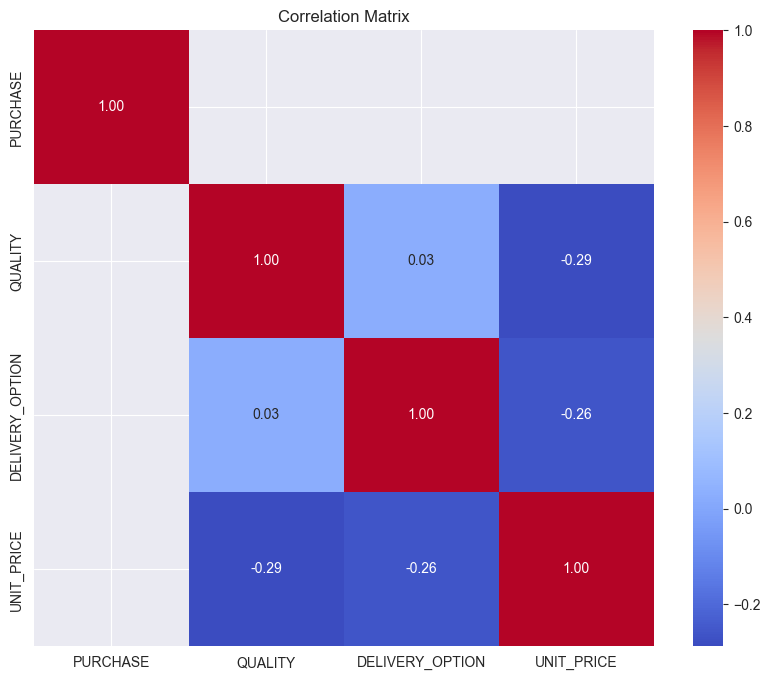

In [131]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()